## Turing Equations

$\frac{\partial a}{\partial t}=f_1(a,h)+D\triangle a$

$\frac{\partial h}{\partial t}=f_2(a,h)+\partial\triangle a$

where

$f_1(a,h)=c_1-c_2a+\frac{a^2}{h(1+Ka^2)}$

$f_2(a,h)=a^2-h$

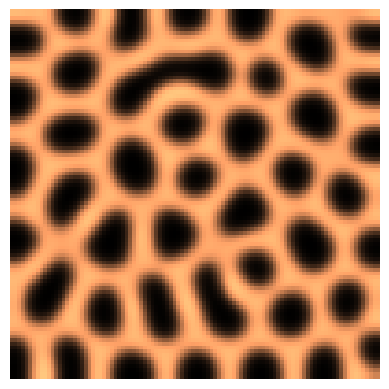

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from pde_utils import neumann_laplacian as laplacian

# definte parameters
D = 1
rho = 40
c1 = 0.01
c2 = 1.2
K = 1

size = 100 # number of cells
dt = 0.001  # time step
dx = 1.0 # for laplacian (dx = dy)
t = 100.0 # run time

A = 0.1 + 0.9 * np.random.rand(size, size) #initial values of A
H = np.full((size, size),0.1) # initial values of H

# define Gierer/Meinhardt functions
def f1(B,C):
    return c1 - c2*B + (B**2)/(C*(1+K*B**2))
    
def f2(B,C):
    return B**2 - C

# set up figure
fig, ax = plt.subplots()
ax.axis('off')
frames = []

# simulate the PDE with finite difference method
for i in range(int(t/dt)):

    # Update interiors of A and H
    A[1:-1, 1:-1] = A[1:-1, 1:-1] + dt * (f1(A[1:-1, 1:-1],H[1:-1, 1:-1]) + D*laplacian(A))
    H[1:-1, 1:-1] = H[1:-1, 1:-1] + dt * (f2(A[1:-1, 1:-1],H[1:-1, 1:-1]) + rho*laplacian(H))

    # Apply Neumann conditions to boundaries
    for Z in (A, H):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # capture a frame every 5 seconds
    if i % 5000 == 0:
        frame = [ax.imshow(A.copy(), cmap='copper', animated=True)]
        frames.append(frame)

# save animation
animation.ArtistAnimation(fig, frames, interval=50, blit=True).save('animations/turing.gif', writer=PillowWriter(fps=10))